In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rawpy
import cv2
import imageio
import sklearn.preprocessing

test = np.fromfile('flat_test_4_Depth.raw', dtype=np.int16, count=- 1, sep='')

test = np.reshape(test, (int(480/2), int(848/2)))

low_max = 10000
for i in range(0, 240):
    temp = np.max(test[i, 0:])
    if temp < low_max:
        low_max = temp
        loc = i
print(low_max, loc)
    
# new_test = np.zeros(np.shape(test))
# for i in range(0, 240):
#     diff = np.max(test[i, 0:])-low_max
#     plt.plot(test[i, 0:]-diff)
#     new_test[i, 0:] = test[i, 0:]-diff
plt.figure(figsize=(10,10))
norm = np.zeros(np.shape(test))
lowest = test[loc, 0:]
for i in range(0, 240):
    diff = np.max(test[i, 0:])-low_max
    norm[i, 0:] = test[i, 0:] - diff
    plt.plot(norm[i, 0:])
    
var_col = []
mean_col = []
for i in range(0, 424):
    var_col.append(np.var(norm[0:, i]))
    mean_col.append(np.mean(norm[0:, i]))
plt.figure()
plt.plot(mean_col[20:])
plt.figure()
plt.plot(var_col[20:])

var_row = []
mean_row = []
for i in range(0, 240):
    var_row.append(np.var(norm[i, 20:]))
    mean_row.append(np.mean(norm[i, 20:]))
plt.figure()
plt.plot(mean_row)
plt.figure()
plt.plot(var_row)

FileNotFoundError: [Errno 2] No such file or directory: 'flat_test_4_Depth.raw'

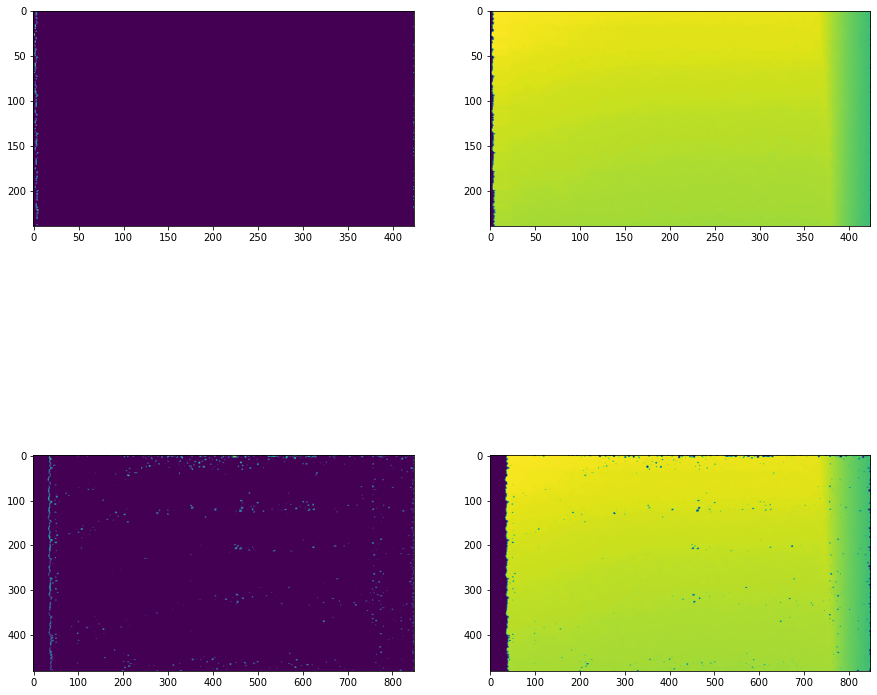

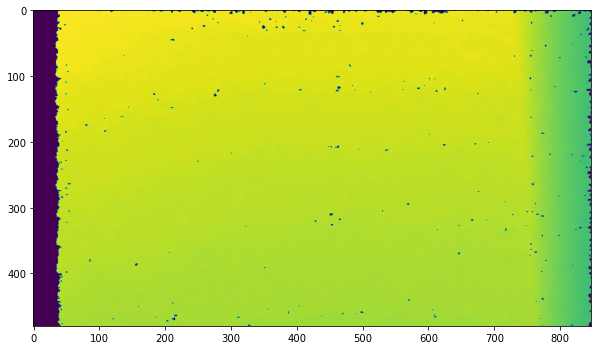

In [7]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import imageio
import time

num_images = 50

pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.any, 848, 480, rs.format.z16, 30)
pipeline.start(config)

#Setting up filters
decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 2)

spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 2)


storage = np.zeros((240,424, num_images))
sum_frame = np.zeros((240, 424))
#mean_frame = np.zeros((848, 480))
#var_frame = np.zeros((848, 480))


for i in range(0, num_images):
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    
    #filtering
    decimated_depth = decimation.process(depth_frame)
    filtered_depth = spatial.process(decimated_depth)
    
    
    depth_image = np.asanyarray(filtered_depth.get_data())
    storage[0:, 0:, i] = depth_image
    sum_frame = sum_frame+depth_image
    time.sleep(0.001)
    
mean_frame = sum_frame/num_images
var_frame = np.var(storage, axis=2)

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.imshow(var_frame)

plt.subplot(2, 2, 2)
plt.imshow(mean_frame)


storage = np.zeros((480,848, num_images))
sum_frame = np.zeros((480,848))


for i in range(0, num_images):
    frames = pipeline.wait_for_frames()
    depth_frame = frames.get_depth_frame()
    depth_image = np.asanyarray(depth_frame.get_data())
    storage[0:, 0:, i] = depth_image
    sum_frame = sum_frame+depth_image
    time.sleep(0.001)
    
    

pipeline.stop()


mean_frame = sum_frame/num_images
var_frame = np.var(storage, axis=2)

plt.subplot(2, 2, 3)
plt.imshow(var_frame)

plt.subplot(2, 2, 4)
plt.imshow(mean_frame)

plt.figure(figsize=(10,10))
plt.imshow(depth_image)

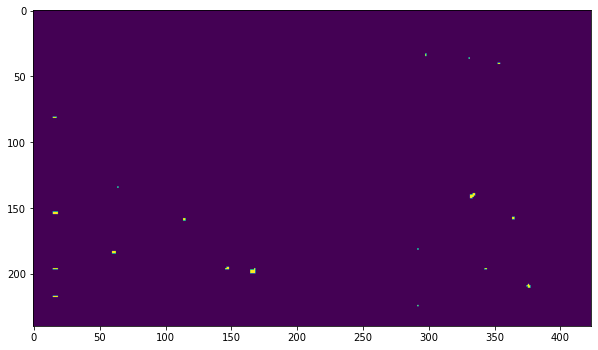

In [8]:
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import numpy as np
import skimage.filters

num_images = 50

pipeline = rs.pipeline()
config = rs.config()
config.enable_stream(rs.stream.any, 848, 480, rs.format.z16, 30)
pipeline.start(config)

#Setting up filters
decimation = rs.decimation_filter()
decimation.set_option(rs.option.filter_magnitude, 2)

spatial = rs.spatial_filter()
spatial.set_option(rs.option.filter_magnitude, 5)
spatial.set_option(rs.option.filter_smooth_alpha, 1)
spatial.set_option(rs.option.filter_smooth_delta, 50)
spatial.set_option(rs.option.holes_fill, 2)

frames = pipeline.wait_for_frames()
depth_frame = frames.get_depth_frame()
    
#filtering
decimated_depth = decimation.process(depth_frame)
filtered_depth = spatial.process(decimated_depth)
    
pipeline.stop()
depth_image = np.asanyarray(filtered_depth.get_data())

depth_image = skimage.feature.peak_local_max(depth_image, min_distance=15, exclude_border=True, indices=False)

plt.figure(figsize=(10,10))
plt.imshow(depth_image)